In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
##easy straight forward function to calculate charge changing cross section without any corrections
def cccs(filename,target_thickness):
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
    df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
    print(df)
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    print(T_2198)
    print(T_1086)
    print(T_54)
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))

        cc_2198 = factor_2198*(-math.log(dz_2198))
        cc_1086 = factor_1086*(-math.log(dz_1086))
        cc_54 = factor_54*(-math.log(dz_54))
        cc_2198_val.append(cc_2198)
        cc_1086_val.append(cc_1086)
        cc_54_val.append(cc_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val
    
def cccs_loop(filename,target_thickness):
    column_names = ["datatype","targettype","RunID","energy","incoming ions"]
    for i in range(40):
        column_names.append(f"surv_ion_{i}")
    print(column_names)
    df = pd.read_csv(filename,sep='\t',names=column_names)
    for i in range(40):
        df[f"d_survived_{i}"] = 1-df[f"surv_ion_{i}"]/df["incoming ions"]
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        loop_2198 = []
        loop_1086 = []
        loop_54 = []
        for i in range(40):
            dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            cc_2198 = factor_2198*(-math.log(dz_2198))
            cc_1086 = factor_1086*(-math.log(dz_1086))
            cc_54 = factor_54*(-math.log(dz_54))
            loop_2198.append(cc_2198)
            loop_1086.append(cc_1086)
            loop_54.append(cc_54)
        cc_2198_val.append(loop_2198)
        cc_1086_val.append(loop_1086)
        cc_54_val.append(loop_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val        
    
    
def stat_errors(filename,target_thickness):
    targettype = None
    factor = None
    n_t = None
    delta_n_t = None
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    if (target_thickness == "thin"):
        targettype = "c_54"
        factor = (1./T_54)*(pow(10,27))
        n_t = T_54
        delta_n_t = 0.000648
    if (target_thickness == "medium"):
        targettype = "c_1086"
        n_t = T_1086
        delta_n_t = 0.002620
        factor = (1./T_1086)*(pow(10,27))
    if (target_thickness == "thick"):
        targettype = "c_2198"
        n_t = T_2198
        delta_n_t = 0.000322
        factor = (1./T_2198)*(pow(10,27))
        
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
    df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
    
    error_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        dz = (1-float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        cc = factor*(-math.log(dz))
        
        r_survived_target = 1-float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_survived']) 
        r_survived_empty = 1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived'])
        n_i_t = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['incoming ions'])
        n_i_e = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['incoming ions'])
        target_error = pow(cc*delta_n_t,2)
        print(target_error)
        print(cc)
        print("survived target\t",r_survived_target)
        counting_error = (pow(10,54))*(1./(n_t*n_t))*((1-r_survived_target)/(r_survived_target*n_i_t)+(1-r_survived_empty)/(r_survived_empty*n_i_e))
        print(counting_error)
        total_error = math.sqrt(target_error + counting_error)
        print("total error\t",total_error)
        error_val.append(total_error)
    return error_val

In [3]:
file_gauss2d_border_3_5_sigma = 'numbers/comb_gauss2d_border.txt'
file_gauss2d_border_loop = 'numbers/comb_loop_gauss2d_border.txt'
file_gauss2d_no_border_3_5_sigma = 'numbers/comb_gauss2d_no_border.txt'


cccs_border_3_5_thin = cccs(file_gauss2d_border_3_5_sigma,"thin")
cccs_border_3_5_medium = cccs(file_gauss2d_border_3_5_sigma,"medium")
cccs_border_3_5_thick = cccs(file_gauss2d_border_3_5_sigma,"thick")

cccs_no_border_3_5_thin = cccs(file_gauss2d_no_border_3_5_sigma,"thin")
cccs_no_border_3_5_medium = cccs(file_gauss2d_no_border_3_5_sigma,"medium")
cccs_no_border_3_5_thick = cccs(file_gauss2d_no_border_3_5_sigma,"thick")

tick_target_cccs = cccs_loop(file_gauss2d_border_loop,"thick")
medium_target_cccs = cccs_loop(file_gauss2d_border_loop,"medium")
thin_target_cccs = cccs_loop(file_gauss2d_border_loop,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()

#file_gauss2d_no_border_3_5_sigma = 


   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         552763   
1       exp     c_1086  0101_0001     550         451137         410376   
2       exp     c_1086  0127_0001     650         500688         455159   
3       exp     c_1086  0168_0001     800         345654         314119   
4       exp     c_2198  0183_0001     400         655762         553935   
5       exp     c_2198  0103_0001     550         436457         368004   
6       exp     c_2198  0130_0001     650         530869         446115   
7       exp     c_2198  0170_0001     800         479679         402696   
8       exp       c_54  0179_0001     400         569503         538245   
9       exp       c_54  0099_0001     550         476323         449422   
10      exp       c_54  0126_0001     650         538037         507557   
11      exp       c_54  0166_0001     800         481459         454099   
12      exp      empty  0

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

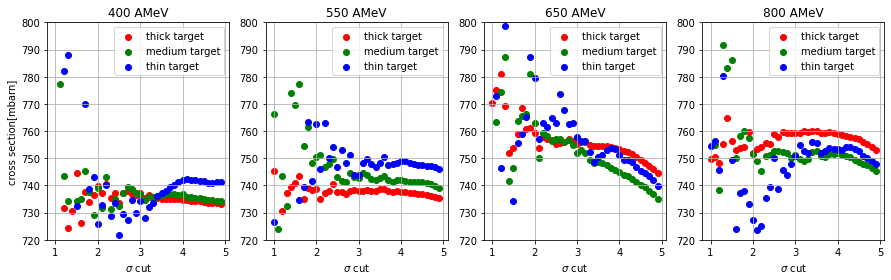

In [4]:
fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.savefig('cccs_vs_sigma_cut.png')

## plot now charge changing cross section with and without border using 2d gaussian fit

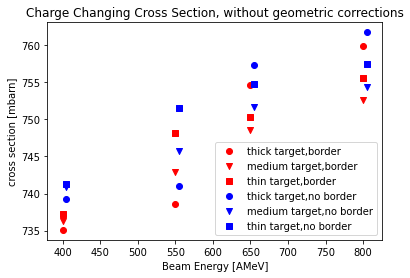

In [5]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,border",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,border",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,border",color='red',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_no_border_3_5_thick,label="thick target,no border",color='blue',marker="o")
ax.scatter(energy,cccs_no_border_3_5_medium,label="medium target,no border",color='blue',marker="v")
ax.scatter(energy,cccs_no_border_3_5_thin,label="thin target,no border",color='blue',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.set_title("Charge Changing Cross Section, without geometric corrections")
plt.savefig('cccs_with_out_border_3_5_sigma.png')

## compare different cut methods: 2d gaussian vs diagonal (with borders)

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         554818   
1       exp     c_1086  0101_0001     550         451137         411789   
2       exp     c_1086  0127_0001     650         500688         456917   
3       exp     c_1086  0168_0001     800         345654         315214   
4       exp     c_2198  0183_0001     400         655762         556116   
5       exp     c_2198  0103_0001     550         436457         369304   
6       exp     c_2198  0130_0001     650         530869         447799   
7       exp     c_2198  0170_0001     800         479679         404100   
8       exp       c_54  0179_0001     400         569503         540051   
9       exp       c_54  0099_0001     550         476323         450914   
10      exp       c_54  0126_0001     650         538037         509332   
11      exp       c_54  0166_0001     800         481459         455647   
12      exp      empty  0

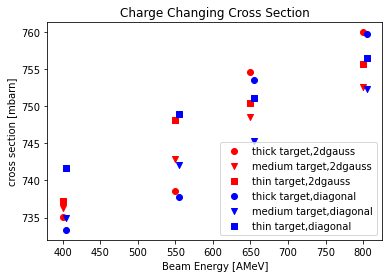

In [6]:
##diagonal cut method
filename_diagonal_3_5_borders = 'numbers/comb_diag_with_border_3_5.txt'
diag_cccs_border_3_5_thin = cccs(filename_diagonal_3_5_borders,"thin")
diag_cccs_border_3_5_medium = cccs(filename_diagonal_3_5_borders,"medium")
diag_cccs_border_3_5_thick = cccs(filename_diagonal_3_5_borders,"thick")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,2dgauss",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,2dgauss",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,2dgauss",color='red',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,diag_cccs_border_3_5_thick,label="thick target,diagonal",color='blue',marker="o")
ax.scatter(energy,diag_cccs_border_3_5_medium,label="medium target,diagonal",color='blue',marker="v")
ax.scatter(energy,diag_cccs_border_3_5_thin,label="thin target,diagonal",color='blue',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.set_title("Charge Changing Cross Section")
plt.savefig('cccs_gauss_diag_comp_3_5_sigma.png')

## analysis on the sigma cut when using diagonal method

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

Text(0.5, 0.98, 'Analysis of sigma cut for diagonal selection method')

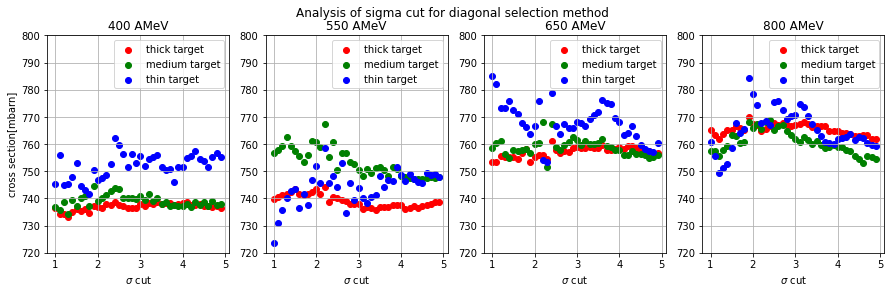

In [7]:
filename_diagonal_3_5_borders_loop = 'numbers/comb_loop_diag_with_border.txt'


tick_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"thick")
medium_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"medium")
thin_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for diagonal selection method")
#plt.savefig('cccs_vs_sigma_cut.png')

## using different combinations of anodes

## leaving out first and last anode

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         552702   
1       exp     c_1086  0101_0001     550         451137         410344   
2       exp     c_1086  0127_0001     650         500688         455163   
3       exp     c_1086  0168_0001     800         345654         314125   
4       exp     c_2198  0183_0001     400         655762         553819   
5       exp     c_2198  0103_0001     550         436457         367987   
6       exp     c_2198  0130_0001     650         530869         446103   
7       exp     c_2198  0170_0001     800         479679         402699   
8       exp       c_54  0179_0001     400         569503         538230   
9       exp       c_54  0099_0001     550         476323         449358   
10      exp       c_54  0126_0001     650         538037         507488   
11      exp       c_54  0166_0001     800         481459         454142   
12      exp      empty  0

[734.8831424567892, 749.0337484634641, 749.4862195405082, 750.7357675545444]
[735.9096862317114, 742.6836174534235, 746.6495132756809, 750.9029434241093]
[735.4023672687659, 738.3501183793855, 753.9176887415273, 759.1688977064233]
[737.174483047875, 748.1748819584224, 750.3901723987364, 755.6683623477053]
[736.2433733064078, 742.8931290898332, 748.5510821602252, 752.6395243205427]
[735.0797827297906, 738.6094229725691, 754.6782815937042, 759.9663939933411]


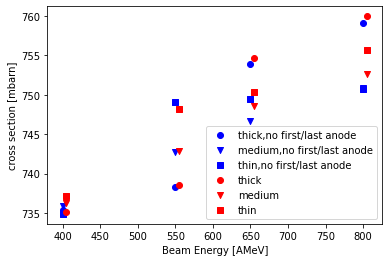

In [8]:
file_no_first_last_gaus2d_border_35 = "numbers/comb_justnotlastfirstanode_gauss2d_border.txt"
cccs_border_3_5_thin_no_first_last = cccs(file_no_first_last_gaus2d_border_35,"thin")
cccs_border_3_5_medium_no_first_last = cccs(file_no_first_last_gaus2d_border_35,"medium")
cccs_border_3_5_thick_no_first_last = cccs(file_no_first_last_gaus2d_border_35,"thick")

file_gauss2d_border_3_5_sigma = 'comb_gauss2d_border.txt'


cccs_border_3_5_thin = cccs(file_gauss2d_border_3_5_sigma,"thin")
cccs_border_3_5_medium = cccs(file_gauss2d_border_3_5_sigma,"medium")
cccs_border_3_5_thick = cccs(file_gauss2d_border_3_5_sigma,"thick")


print(cccs_border_3_5_thin_no_first_last)
print(cccs_border_3_5_medium_no_first_last)
print(cccs_border_3_5_thick_no_first_last)

print(cccs_border_3_5_thin)
print(cccs_border_3_5_medium)
print(cccs_border_3_5_thick)

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick_no_first_last,label="thick,no first/last anode",color='blue',marker="o")
ax.scatter(energy,cccs_border_3_5_medium_no_first_last,label="medium,no first/last anode",color='blue',marker="v")
ax.scatter(energy,cccs_border_3_5_thin_no_first_last,label="thin,no first/last anode",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
plt.savefig('cccs_comp_all_anodes_no_first_last.png')




### using anode 5-8 and 9-12

In [9]:
file_gauss2d_5_8_9_12_border = "numbers/comb_anode_5_8_9_12_gauss2d_border.txt"

middle_anodes_cccs_border_3_5_thin = cccs(file_gauss2d_5_8_9_12_border,"thin")
middle_anodes_cccs_border_3_5_medium = cccs(file_gauss2d_5_8_9_12_border,"medium")
middle_anodes_cccs_border_3_5_thick = cccs(file_gauss2d_5_8_9_12_border,"thick")

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         552263   
1       exp     c_1086  0101_0001     550         451137         410401   
2       exp     c_1086  0127_0001     650         500688         455834   
3       exp     c_1086  0168_0001     800         345654         314506   
4       exp     c_2198  0183_0001     400         655762         553389   
5       exp     c_2198  0103_0001     550         436457         368203   
6       exp     c_2198  0130_0001     650         530869         447404   
7       exp     c_2198  0170_0001     800         479679         403757   
8       exp       c_54  0179_0001     400         569503         537699   
9       exp       c_54  0099_0001     550         476323         449276   
10      exp       c_54  0126_0001     650         538037         507636   
11      exp       c_54  0166_0001     800         481459         454282   
12      exp      empty  0

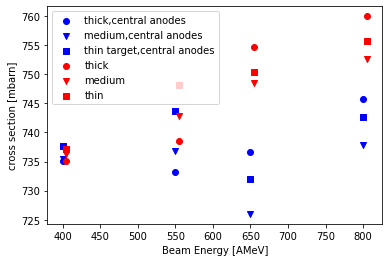

In [10]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,middle_anodes_cccs_border_3_5_thick,label="thick,central anodes",color='blue',marker="o")
ax.scatter(energy,middle_anodes_cccs_border_3_5_medium,label="medium,central anodes",color='blue',marker="v")
ax.scatter(energy,middle_anodes_cccs_border_3_5_thin,label="thin target,central anodes",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
plt.savefig('cccs_comp_central_anodes.png')


### loop over all sigma cuts for anode 5-8 vs 9-12

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

Text(0.5, 0.98, 'Analysis of sigma cut for plot anode 5-8 vs 9-12 method')

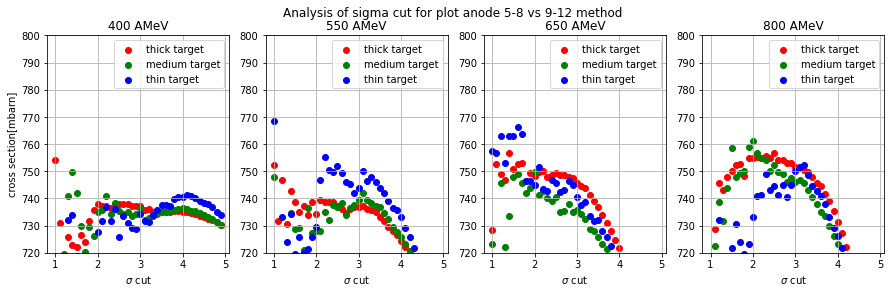

In [11]:
filename = "numbers/comb_loop_anode_5_8_9_12_gauss2d_border.txt"


tick_target_cccs = cccs_loop(filename,"thick")
medium_target_cccs = cccs_loop(filename,"medium")
thin_target_cccs = cccs_loop(filename,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for plot anode 5-8 vs 9-12 method")
#plt.savefig('cccs_vs_sigma_cut.png')

# ---------------------------------------------------------------------------

## using anode 1-4 and 5-8

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         552648   
1       exp     c_1086  0101_0001     550         451137         410858   
2       exp     c_1086  0127_0001     650         500688         456466   
3       exp     c_1086  0168_0001     800         345654         314980   
4       exp     c_2198  0183_0001     400         655762         553777   
5       exp     c_2198  0103_0001     550         436457         368832   
6       exp     c_2198  0130_0001     650         530869         448720   
7       exp     c_2198  0170_0001     800         479679         405018   
8       exp       c_54  0179_0001     400         569503         537921   
9       exp       c_54  0099_0001     550         476323         449690   
10      exp       c_54  0126_0001     650         538037         508165   
11      exp       c_54  0166_0001     800         481459         454812   
12      exp      empty  0

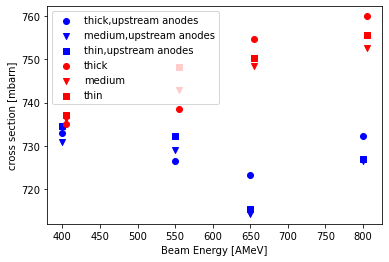

In [12]:
file_gauss2d_1_4_5_8_border = "numbers/comb_anode_1_4_5_8_gauss2d_border.txt"

up_anodes_cccs_border_3_5_thin = cccs(file_gauss2d_1_4_5_8_border,"thin")
up_anodes_cccs_border_3_5_medium = cccs(file_gauss2d_1_4_5_8_border,"medium")
up_anodes_cccs_border_3_5_thick = cccs(file_gauss2d_1_4_5_8_border,"thick")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,up_anodes_cccs_border_3_5_thick,label="thick,upstream anodes",color='blue',marker="o")
ax.scatter(energy,up_anodes_cccs_border_3_5_medium,label="medium,upstream anodes",color='blue',marker="v")
ax.scatter(energy,up_anodes_cccs_border_3_5_thin,label="thin,upstream anodes",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
plt.savefig('cccs_comp_upstream_anodes.png')

### loop over all sigma cuts for anode 1-4 vs 5-8

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

Text(0.5, 0.98, 'Analysis of sigma cut for plot anode 1-4 vs 5-8 method')

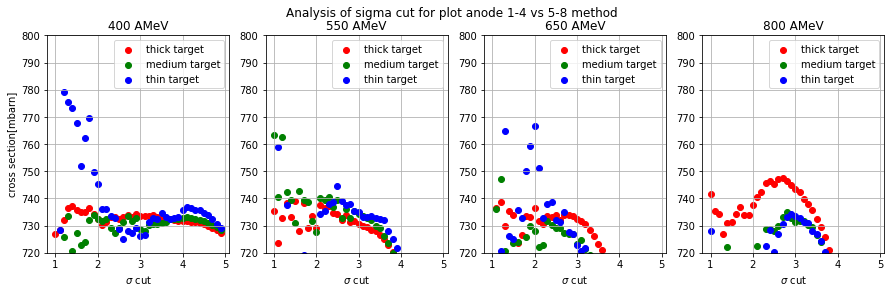

In [13]:
filename = "numbers/comb_loop_anode_1_4_5_8_gauss2d_border.txt"


tick_target_cccs = cccs_loop(filename,"thick")
medium_target_cccs = cccs_loop(filename,"medium")
thin_target_cccs = cccs_loop(filename,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for plot anode 1-4 vs 5-8 method")
#plt.savefig('cccs_vs_sigma_cut.png')

# ---------------------------------------------------------------------------

## using anode 9-12 and 13-16

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         551597   
1       exp     c_1086  0101_0001     550         451137         410079   
2       exp     c_1086  0127_0001     650         500688         455212   
3       exp     c_1086  0168_0001     800         345654         314172   
4       exp     c_2198  0183_0001     400         655762         552569   
5       exp     c_2198  0103_0001     550         436457         367750   
6       exp     c_2198  0130_0001     650         530869         446451   
7       exp     c_2198  0170_0001     800         479679         402879   
8       exp       c_54  0179_0001     400         569503         537349   
9       exp       c_54  0099_0001     550         476323         448831   
10      exp       c_54  0126_0001     650         538037         507288   
11      exp       c_54  0166_0001     800         481459         453939   
12      exp      empty  0

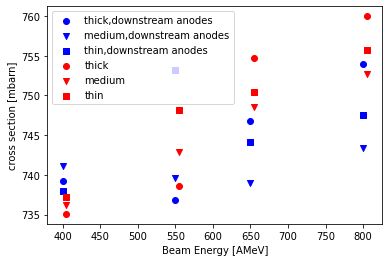

In [14]:
file_gauss2d_9_12_13_16_border = "numbers/comb_anode_9_12_13_16_gauss2d_border.txt"

down_anodes_cccs_border_3_5_thin = cccs(file_gauss2d_9_12_13_16_border,"thin")
down_anodes_cccs_border_3_5_medium = cccs(file_gauss2d_9_12_13_16_border,"medium")
down_anodes_cccs_border_3_5_thick = cccs(file_gauss2d_9_12_13_16_border,"thick")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,down_anodes_cccs_border_3_5_thick,label="thick,downstream anodes",color='blue',marker="o")
ax.scatter(energy,down_anodes_cccs_border_3_5_medium,label="medium,downstream anodes",color='blue',marker="v")
ax.scatter(energy,down_anodes_cccs_border_3_5_thin,label="thin,downstream anodes",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
plt.savefig('cccs_comp_downstream_anodes.png')

### loop over all sigma cuts for anode 9-12 vs 13-16

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

Text(0.5, 0.98, 'Analysis of sigma cut for plot anode 9-12 vs 13-16 method')

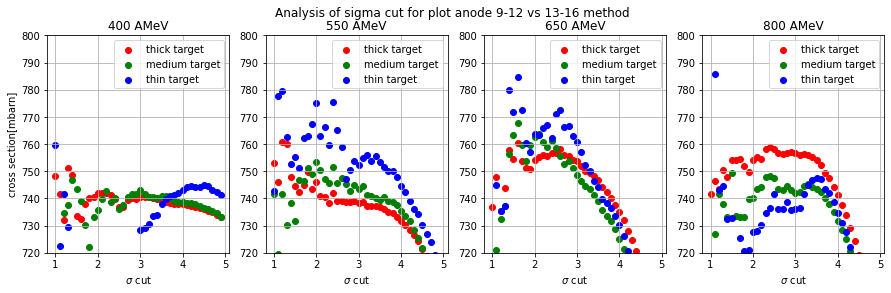

In [15]:
filename = "numbers/comb_loop_anode_9_12_13_16_gauss2d_border.txt"


tick_target_cccs = cccs_loop(filename,"thick")
medium_target_cccs = cccs_loop(filename,"medium")
thin_target_cccs = cccs_loop(filename,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for plot anode 9-12 vs 13-16 method")
#plt.savefig('cccs_vs_sigma_cut.png')

## ------------------------------------------------error meas part--------------------------------

In [16]:
test = 'numbers/comb_gauss2d_border.txt'

In [17]:
err_values_thin = stat_errors(test,"thin")
err_values_medium = stat_errors(test,"medium")
err_values_thick = stat_errors(test,"thick")

0.22818684283492688
737.174483047875
survived target	 0.94511354637289
53.00574390274175
total error	 7.296158629414295
0.23504783717448632
748.1748819584224
survived target	 0.9435236173772839
66.74964843265703
total error	 8.18441789437902
0.2364418163502543
750.3901723987364
survived target	 0.94334962093685
58.99341953515042
total error	 7.696093902201342
0.2397797436896805
755.6683623477053
survived target	 0.9431727312190654
69.13933238972258
total error	 8.32941247228232
3.7208775694407707
736.2433733064078
survived target	 0.9112809894193327
19.353860704341493
total error	 4.803617207249372
3.788395097452836
742.8931290898332
survived target	 0.9096482886573258
26.445237392637406
total error	 5.498511843225423
3.846320483437709
748.5510821602252
survived target	 0.9090671236378742
23.835434589524663
total error	 5.261345367200519
3.8884509510021514
752.6395243205427
survived target	 0.9087671486515417
34.11072782637695
total error	 6.16434739265878
0.05602484968303486
735.07978

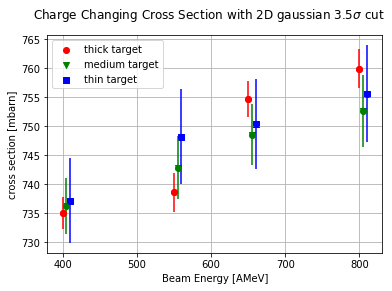

In [18]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target",color='red',marker="o")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_medium,label="medium target",color='green',marker="v")
energy = [410,560,660,810]
ax.scatter(energy,cccs_border_3_5_thin,label="thin target",color='blue',marker="s")
energy = [400,550,650,800]
ax.errorbar(energy,cccs_border_3_5_thick,yerr=err_values_thick,fmt="o",color="red")
energy = [405,555,655,805]
ax.errorbar(energy,cccs_border_3_5_medium,yerr=err_values_medium,fmt="o",color="green")
energy = [410,560,660,810]
ax.errorbar(energy,cccs_border_3_5_thin,yerr=err_values_thin,fmt="o",color="blue")
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
fig.suptitle(r"Charge Changing Cross Section with 2D gaussian 3.5$\sigma$ cut")
plt.savefig('cccs_with_stat_errors.png',dpi=150)

In [19]:
file_energy = 'comb_gauss_with_energy_sorted.txt'

In [20]:
cccs_border_3_5_thin_energy = cccs(file_energy,"thin")
cccs_border_3_5_medium_energy = cccs(file_energy,"medium")
cccs_border_3_5_thick_energy = cccs(file_energy,"thick")

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         552735   
1       exp     c_1086  0101_0001     550         451137         410371   
2       exp     c_1086  0127_0001     650         500688         455143   
3       exp     c_1086  0168_0001     800         345654         314104   
4       exp     c_2198  0183_0001     400         655762         553919   
5       exp     c_2198  0103_0001     550         436457         368005   
6       exp     c_2198  0130_0001     650         530869         446122   
7       exp     c_2198  0170_0001     800         479679         402682   
8       exp       c_54  0179_0001     400         569503         538215   
9       exp       c_54  0099_0001     550         476323         449410   
10      exp       c_54  0126_0001     650         538037         507545   
11      exp       c_54  0166_0001     800         481459         454039   
12      exp      empty  0

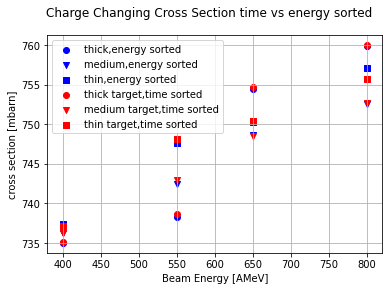

In [21]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick_energy,label="thick,energy sorted",color='blue',marker="o")
#energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_medium_energy,label="medium,energy sorted",color='blue',marker="v")
#energy = [410,560,660,810]
ax.scatter(energy,cccs_border_3_5_thin_energy,label="thin,energy sorted",color='blue',marker="s")
#energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,time sorted",color='red',marker="o")
#energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,time sorted",color='red',marker="v")
#energy = [410,560,660,810]
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,time sorted",color='red',marker="s")
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
fig.suptitle(r"Charge Changing Cross Section time vs energy sorted")
plt.savefig('cccs_time_vs_engergy_sorted.png',dpi=150)

### just testing other run for 400 amev thin target, are there any changes....?

In [22]:
filename_energy_sorted_other = 'comb_all_energy.txt'

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400       606578.0       552735.0   
1       exp     c_1086  0101_0001     550       451137.0       410371.0   
2       exp     c_1086  0127_0001     650       500688.0       455143.0   
3       exp     c_1086  0168_0001     800       345654.0       314104.0   
4       exp     c_2198  0183_0001     400       655762.0       553919.0   
5       exp     c_2198  0103_0001     550       436457.0       368005.0   
6       exp     c_2198  0130_0001     650       530869.0       446122.0   
7       exp     c_2198  0170_0001     800       479679.0       402682.0   
8       exp       c_54  0192_0001     400      1067610.0      1009360.0   
9       exp       c_54  0099_0001     550       476323.0       449410.0   
10      exp       c_54  0126_0001     650       538037.0       507545.0   
11      exp       c_54  0166_0001     800       481459.0       454039.0   
12      exp      empty  0

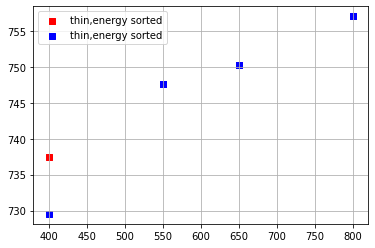

In [23]:
cccs_border_3_5_thin_energy_other = cccs(filename_energy_sorted_other,"thin")
print(cccs_border_3_5_thin_energy_other)
print(cccs_border_3_5_thin_energy)
fig, ax = plt.subplots()
ax.scatter(energy,cccs_border_3_5_thin_energy,label="thin,energy sorted",color='red',marker="s")
ax.scatter(energy,cccs_border_3_5_thin_energy_other,label="thin,energy sorted",color='blue',marker="s")
ax.legend()
ax.grid()

## -------------

## writing incoming ions as double  and not as longlong

In [24]:
filename_energy_double = 'comb_gauss_with_energy_sorted_revised.txt'
cccs_border_3_5_thin_energy_double = cccs(filename_energy_double,"thin")
cccs_border_3_5_medium_energy_double = cccs(filename_energy_double,"medium")
cccs_border_3_5_thick_energy_double = cccs(filename_energy_double,"thick")

   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         552735   
1       exp     c_1086  0101_0001     550         451137         410371   
2       exp     c_1086  0127_0001     650         500688         455143   
3       exp     c_1086  0168_0001     800         345654         314104   
4       exp     c_2198  0183_0001     400         655762         553919   
5       exp     c_2198  0103_0001     550         436457         368005   
6       exp     c_2198  0130_0001     650         530869         446122   
7       exp     c_2198  0170_0001     800         479679         402682   
8       exp       c_54  0179_0001     400         569503         538215   
9       exp       c_54  0099_0001     550         476323         449410   
10      exp       c_54  0126_0001     650         538037         507545   
11      exp       c_54  0166_0001     800         481459         454039   
12      exp      empty  0

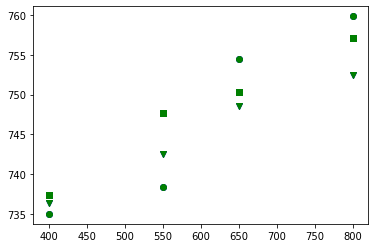

In [25]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick_energy,label="thick,energy sorted",color='blue',marker="o")
#energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_medium_energy,label="medium,energy sorted",color='blue',marker="v")
#energy = [410,560,660,810]
ax.scatter(energy,cccs_border_3_5_thin_energy,label="thin,energy sorted",color='blue',marker="s")
###################
ax.scatter(energy,cccs_border_3_5_thick_energy_double,label="thick,energy double",color='green',marker="o")
#energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_medium_energy_double,label="medium,energy double",color='green',marker="v")
#energy = [410,560,660,810]
ax.scatter(energy,cccs_border_3_5_thin_energy_double,label="thin,energy double",color='green',marker="s")


In [26]:
filename_energy_loop = "combined_loop_with_energy.txt"
tick_target_cccs_energy = cccs_loop(filename_energy_loop,"thick")
medium_target_cccs_energy = cccs_loop(filename_energy_loop,"medium")
thin_target_cccs_energy = cccs_loop(filename_energy_loop,"thin")

#thick values
thick_400 = tick_target_cccs_energy[0]
#medium values
medium_400 = medium_target_cccs_energy[0]
#thin values
thin_400 = thin_target_cccs_energy[0]


['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

Text(0, 0.5, 'cross section[mbarn]')

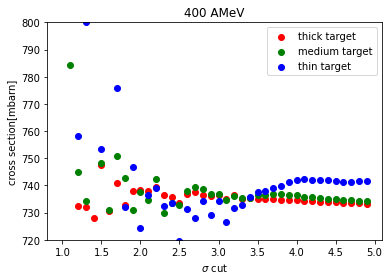

In [27]:
bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots()
#fig.tight_layout()
ax.set_ylim([720,800])
ax.scatter(bins,thick_400,label="thick target",color='red',marker="o")
ax.scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax.scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax.legend()
ax.set_title("400 AMeV")
ax.set_xlabel(r'$\sigma$ cut')
ax.set_ylabel("cross section[mbarn]")

## now with runnr 192 for 400 amev thin target...

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

Text(0, 0.5, 'cross section[mbarn]')

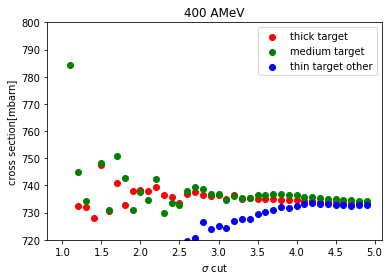

In [28]:
filename_energy_loop_other = "combined_loop_with_energy_other.txt"
thick_target_cccs_energy_other = cccs_loop(filename_energy_loop_other,"thick")
medium_target_cccs_energy_other = cccs_loop(filename_energy_loop_other,"medium")
thin_target_cccs_energy_other = cccs_loop(filename_energy_loop_other,"thin")

#thick values
thick_400 = thick_target_cccs_energy_other[0]
#medium values
medium_400 = medium_target_cccs_energy_other[0]
#thin values
thin_400 = thin_target_cccs_energy_other[0]
bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots()
#fig.tight_layout()
ax.set_ylim([720,800])
ax.scatter(bins,thick_400,label="thick target",color='red',marker="o")
ax.scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax.scatter(bins,thin_400,label="thin target other",color='blue',marker="o")
ax.legend()
ax.set_title("400 AMeV")
ax.set_xlabel(r'$\sigma$ cut')
ax.set_ylabel("cross section[mbarn]")


## -----------------------------------

In [29]:

file_gauss2d_border_3_5_sigma = 'numbers/comb_gauss2d_border.txt'


cccs_border_3_5_thin = cccs(file_gauss2d_border_3_5_sigma,"thin")
cccs_border_3_5_medium = cccs(file_gauss2d_border_3_5_sigma,"medium")
cccs_border_3_5_thick = cccs(file_gauss2d_border_3_5_sigma,"thick")



   datatype targettype      RunID  energy  incoming ions  survived_ions  \
0       exp     c_1086  0181_0001     400         606578         552763   
1       exp     c_1086  0101_0001     550         451137         410376   
2       exp     c_1086  0127_0001     650         500688         455159   
3       exp     c_1086  0168_0001     800         345654         314119   
4       exp     c_2198  0183_0001     400         655762         553935   
5       exp     c_2198  0103_0001     550         436457         368004   
6       exp     c_2198  0130_0001     650         530869         446115   
7       exp     c_2198  0170_0001     800         479679         402696   
8       exp       c_54  0179_0001     400         569503         538245   
9       exp       c_54  0099_0001     550         476323         449422   
10      exp       c_54  0126_0001     650         538037         507557   
11      exp       c_54  0166_0001     800         481459         454099   
12      exp      empty  0

## ----- iso correction numbers...-----------------

In [30]:
file_iso_corr_own_cluster = "carbon_ident_own_cluster.txt"
df_iso_own = pd.read_csv(file_iso_corr_own_cluster,sep='\t',names=["datatype","targettype","RunID","energy","frac_11c","cluster_eff","survived_mw3"])
file_iso_corr_default_cluster = "carbon_ident_default_cluster.txt"
df_iso_default = pd.read_csv(file_iso_corr_default_cluster,sep='\t',names=["datatype","targettype","RunID","energy","frac_11c","cluster_eff","survived_mw3"])
file_iso_no_cut = "indep_iso_corr_no_cut_at_all.txt"
df_iso_no_cut = pd.read_csv(file_iso_no_cut,sep='\t',names=["datatype","targettype","RunID","energy","frac_11c","cluster_eff","survived_mw3"])


iso_corr_2198 = df_iso_own.loc[(df_iso_own["targettype"] == "c_2198")]['frac_11c']
iso_corr_1086 = df_iso_own.loc[(df_iso_own["targettype"] == "c_1086")]['frac_11c']
iso_corr_54 = df_iso_own.loc[(df_iso_own["targettype"] == "c_54")]['frac_11c']
iso_corr_empty = df_iso_own.loc[(df_iso_own["targettype"] == "empty")]['frac_11c']

energy = [400,550,650,800]
print(iso_corr_empty)

12    0.002378
13    0.002319
14    0.002294
15    0.001752
Name: frac_11c, dtype: float64


Text(0, 0.5, 'Fraction of 11C isotopes')

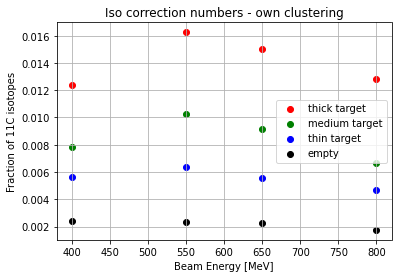

In [31]:
fig, ax = plt.subplots()
#fig.tight_layout()

ax.scatter(energy,iso_corr_2198,label="thick target",color='red',marker="o")
ax.scatter(energy,iso_corr_1086,label="medium target",color='green',marker="o")
ax.scatter(energy,iso_corr_54,label="thin target",color='blue',marker="o")
ax.scatter(energy,iso_corr_empty,label="empty",color='black',marker="o")
ax.legend()
ax.grid()
ax.set_title("Iso correction numbers - own clustering")
ax.set_xlabel("Beam Energy [MeV]")
ax.set_ylabel("Fraction of 11C isotopes")

### now iso correction numbers using default clustering (but with cut on MW12x plot)

In [32]:
iso_corr_2198_def = df_iso_default.loc[(df_iso_default["targettype"] == "c_2198")]['frac_11c']
iso_corr_1086_def = df_iso_default.loc[(df_iso_default["targettype"] == "c_1086")]['frac_11c']
iso_corr_54_def = df_iso_default.loc[(df_iso_default["targettype"] == "c_54")]['frac_11c']
iso_corr_empty_def = df_iso_default.loc[(df_iso_default["targettype"] == "empty")]['frac_11c']

Text(0, 0.5, 'Fraction of 11C isotopes')

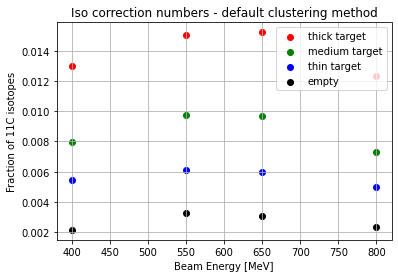

In [33]:
fig, ax = plt.subplots()
#fig.tight_layout()

ax.scatter(energy,iso_corr_2198_def,label="thick target",color='red',marker="o")
ax.scatter(energy,iso_corr_1086_def,label="medium target",color='green',marker="o")
ax.scatter(energy,iso_corr_54_def,label="thin target",color='blue',marker="o")
ax.scatter(energy,iso_corr_empty_def,label="empty",color='black',marker="o")
ax.legend()
ax.grid()
ax.set_title("Iso correction numbers - default clustering method")
ax.set_xlabel("Beam Energy [MeV]")
ax.set_ylabel("Fraction of 11C isotopes")

### really without any cuts - iso corr numbers

In [34]:
iso_corr_2198_no_cut = df_iso_no_cut.loc[(df_iso_no_cut["targettype"] == "c_2198")]['frac_11c']
iso_corr_1086_no_cut = df_iso_no_cut.loc[(df_iso_no_cut["targettype"] == "c_1086")]['frac_11c']
iso_corr_54_no_cut = df_iso_no_cut.loc[(df_iso_no_cut["targettype"] == "c_54")]['frac_11c']
iso_corr_empty_no_cut = df_iso_no_cut.loc[(df_iso_no_cut["targettype"] == "empty")]['frac_11c']

Text(0, 0.5, 'Fraction of 11C isotopes')

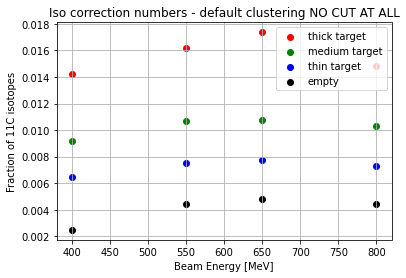

In [35]:
fig, ax = plt.subplots()
#fig.tight_layout()

ax.scatter(energy,iso_corr_2198_no_cut,label="thick target",color='red',marker="o")
ax.scatter(energy,iso_corr_1086_no_cut,label="medium target",color='green',marker="o")
ax.scatter(energy,iso_corr_54_no_cut,label="thin target",color='blue',marker="o")
ax.scatter(energy,iso_corr_empty_no_cut,label="empty",color='black',marker="o")
ax.legend()
ax.grid()
ax.set_title("Iso correction numbers - default clustering NO CUT AT ALL")
ax.set_xlabel("Beam Energy [MeV]")
ax.set_ylabel("Fraction of 11C isotopes")

### use mw1 vs mw3 (own clustering) instead

In [36]:
file_iso_mw13 = "usingmw13_isotope.txt"
df_iso_mw13 = pd.read_csv(file_iso_mw13,sep='\t',names=["datatype","targettype","RunID","energy","frac_11c","cluster_eff","survived_mw3"])

iso_corr_2198_mw13 = df_iso_mw13.loc[(df_iso_mw13["targettype"] == "c_2198")]['frac_11c']
iso_corr_1086_mw13 = df_iso_mw13.loc[(df_iso_mw13["targettype"] == "c_1086")]['frac_11c']
iso_corr_54_mw13 = df_iso_mw13.loc[(df_iso_mw13["targettype"] == "c_54")]['frac_11c']
iso_corr_empty_mw13 = df_iso_mw13.loc[(df_iso_mw13["targettype"] == "empty")]['frac_11c']

Text(0, 0.5, 'Fraction of 11C isotopes')

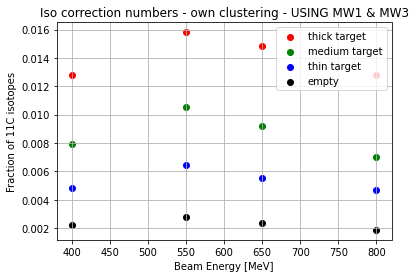

In [37]:
fig, ax = plt.subplots()
#fig.tight_layout()

ax.scatter(energy,iso_corr_2198_mw13,label="thick target",color='red',marker="o")
ax.scatter(energy,iso_corr_1086_mw13,label="medium target",color='green',marker="o")
ax.scatter(energy,iso_corr_54_mw13,label="thin target",color='blue',marker="o")
ax.scatter(energy,iso_corr_empty_mw13,label="empty",color='black',marker="o")
ax.legend()
ax.grid()
ax.set_title("Iso correction numbers - own clustering - USING MW1 & MW3")
ax.set_xlabel("Beam Energy [MeV]")
ax.set_ylabel("Fraction of 11C isotopes")

### use mw1 and mw3 instead, default clustering, NO CUTS

In [38]:
file_iso_mw13_def = "usingmw12_isotope_plain.txt"
df_iso_mw13_def = pd.read_csv(file_iso_mw13_def,sep='\t',names=["datatype","targettype","RunID","energy","frac_11c","cluster_eff","survived_mw3"])

iso_corr_2198_mw13_def = df_iso_mw13_def.loc[(df_iso_mw13_def["targettype"] == "c_2198")]['frac_11c']
iso_corr_1086_mw13_def = df_iso_mw13_def.loc[(df_iso_mw13_def["targettype"] == "c_1086")]['frac_11c']
iso_corr_54_mw13_def = df_iso_mw13_def.loc[(df_iso_mw13_def["targettype"] == "c_54")]['frac_11c']
iso_corr_empty_mw13_def = df_iso_mw13_def.loc[(df_iso_mw13_def["targettype"] == "empty")]['frac_11c']

Text(0, 0.5, 'Fraction of 11C isotopes')

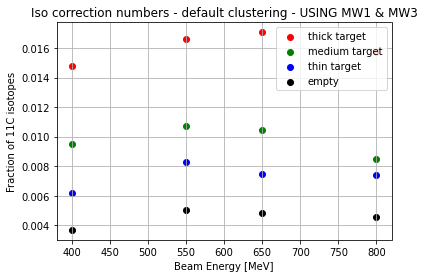

In [39]:
fig, ax = plt.subplots()
#fig.tight_layout()

ax.scatter(energy,iso_corr_2198_mw13_def,label="thick target",color='red',marker="o")
ax.scatter(energy,iso_corr_1086_mw13_def,label="medium target",color='green',marker="o")
ax.scatter(energy,iso_corr_54_mw13_def,label="thin target",color='blue',marker="o")
ax.scatter(energy,iso_corr_empty_mw13_def,label="empty",color='black',marker="o")
ax.legend()
ax.grid()
ax.set_title("Iso correction numbers - default clustering - USING MW1 & MW3")
ax.set_xlabel("Beam Energy [MeV]")
ax.set_ylabel("Fraction of 11C isotopes")

#### to describe how much I cut off from the full statistics when doing my own clustering...

4    0.654185
5    0.663967
6    0.644890
7    0.704664
Name: cluster_eff, dtype: float64


Text(0, 0.5, 'events_clusters/events_default')

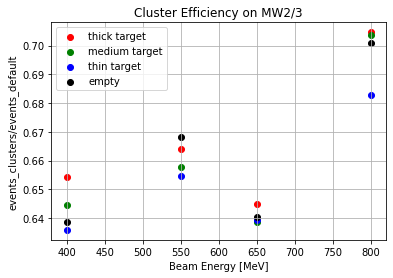

In [40]:
cluster_eff_2198 = df_iso_own.loc[(df_iso_own["targettype"] == "c_2198")]['cluster_eff']
cluster_eff_1086 = df_iso_own.loc[(df_iso_own["targettype"] == "c_1086")]['cluster_eff']
cluster_eff_54 = df_iso_own.loc[(df_iso_own["targettype"] == "c_54")]['cluster_eff']
cluster_eff_empty = df_iso_own.loc[(df_iso_own["targettype"] == "empty")]['cluster_eff']
print(cluster_eff_2198)

fig, ax = plt.subplots()
#fig.tight_layout()

ax.scatter(energy,cluster_eff_2198,label="thick target",color='red',marker="o")
ax.scatter(energy,cluster_eff_1086,label="medium target",color='green',marker="o")
ax.scatter(energy,cluster_eff_54,label="thin target",color='blue',marker="o")
ax.scatter(energy,cluster_eff_empty,label="empty",color='black',marker="o")
ax.legend()
ax.grid()
ax.set_title("Cluster Efficiency on MW2/3")
ax.set_xlabel("Beam Energy [MeV]")
ax.set_ylabel("events_clusters/events_default")


#### to see how many hits at all survive (using default clustering)

4    0.807700
5    0.745964
6    0.817571
7    0.675792
Name: survived_mw3, dtype: float64


Text(0, 0.5, 'events_mw23_default_cluster/clean incoming ions')

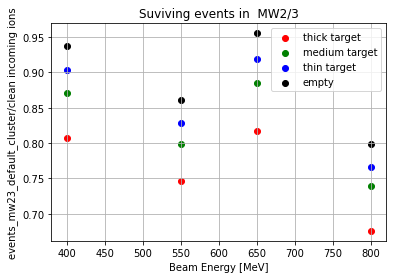

In [41]:
surv23_2198 = df_iso_own.loc[(df_iso_own["targettype"] == "c_2198")]['survived_mw3']
surv23_1086 = df_iso_own.loc[(df_iso_own["targettype"] == "c_1086")]['survived_mw3']
surv23_54 = df_iso_own.loc[(df_iso_own["targettype"] == "c_54")]['survived_mw3']
surv23_empty = df_iso_own.loc[(df_iso_own["targettype"] == "empty")]['survived_mw3']
print(surv23_2198)

fig, ax = plt.subplots()
#fig.tight_layout()

ax.scatter(energy,surv23_2198,label="thick target",color='red',marker="o")
ax.scatter(energy,surv23_1086,label="medium target",color='green',marker="o")
ax.scatter(energy,surv23_54,label="thin target",color='blue',marker="o")
ax.scatter(energy,surv23_empty,label="empty",color='black',marker="o")
ax.legend()
ax.grid()
ax.set_title("Suviving events in  MW2/3")
ax.set_xlabel("Beam Energy [MeV]")
ax.set_ylabel("events_mw23_default_cluster/clean incoming ions")

## ratio events mw2/3 vs incoming  

## ratio mw2 vs incoming


## ratio mw3 vs incoming